Question 5. Write a code to obtain a fully grown regression tree for the data given in Q2 and visualize the regression tree.

In [46]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [47]:
X1 = [1, 2, 3, 4, 5, 6, 7, 8]
X = [[x] for x in X1]
y = [10, 12, 15, 18, 21, 25, 28, 30]

In [48]:
regressor = DecisionTreeRegressor()
regressor.fit(X, y)

DecisionTreeRegressor()

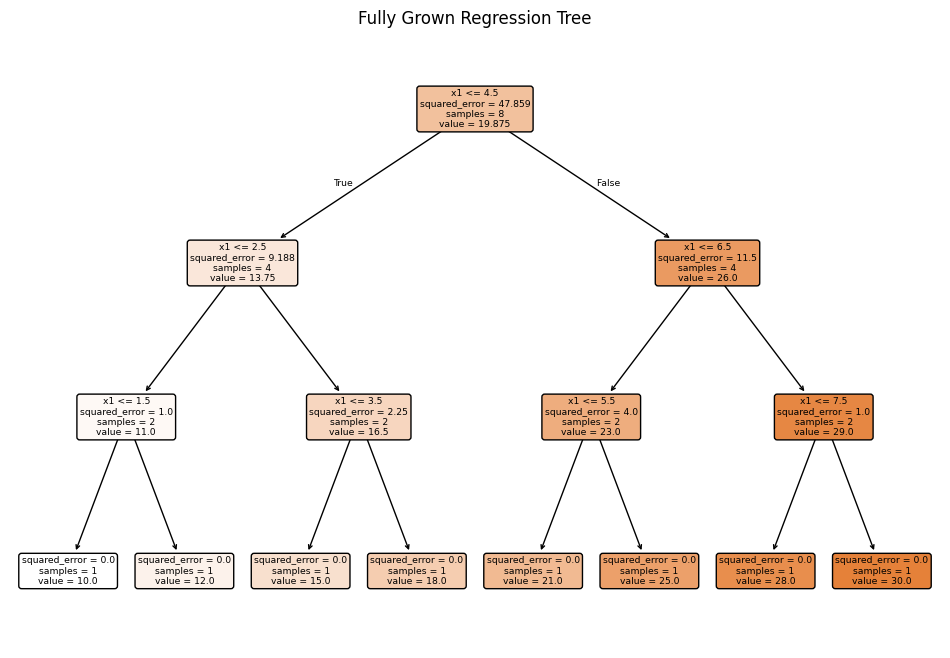

In [49]:
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=['x1'], rounded=True)
plt.title('Fully Grown Regression Tree')
plt.show()

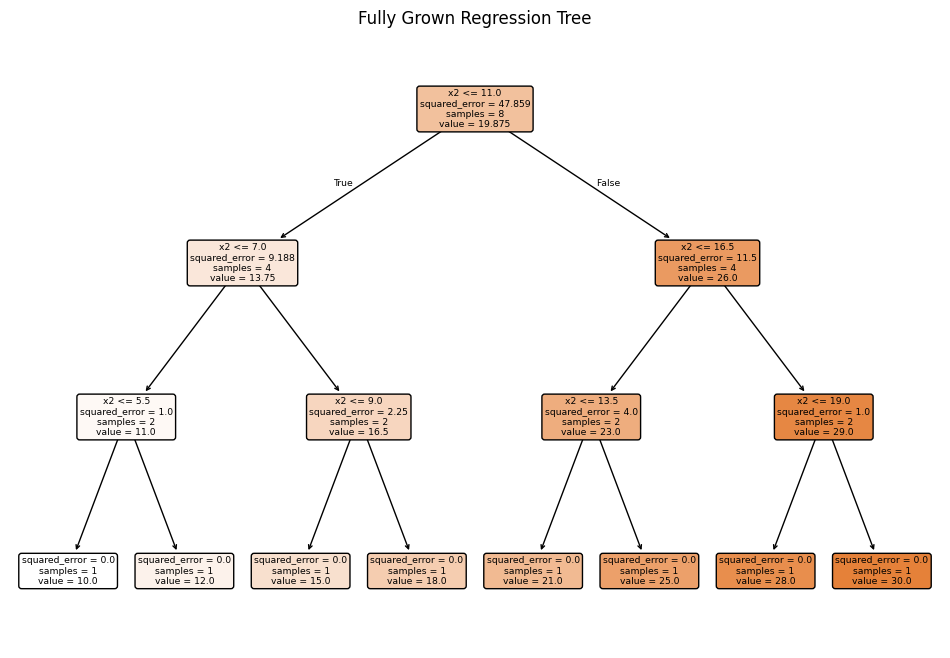

In [50]:
X2 = [5, 6, 8, 10, 12, 15, 18, 20]

X = [[x] for x in X2]

regressor = DecisionTreeRegressor()
regressor.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=['x2'], rounded=True)
plt.title('Fully Grown Regression Tree')
plt.show()

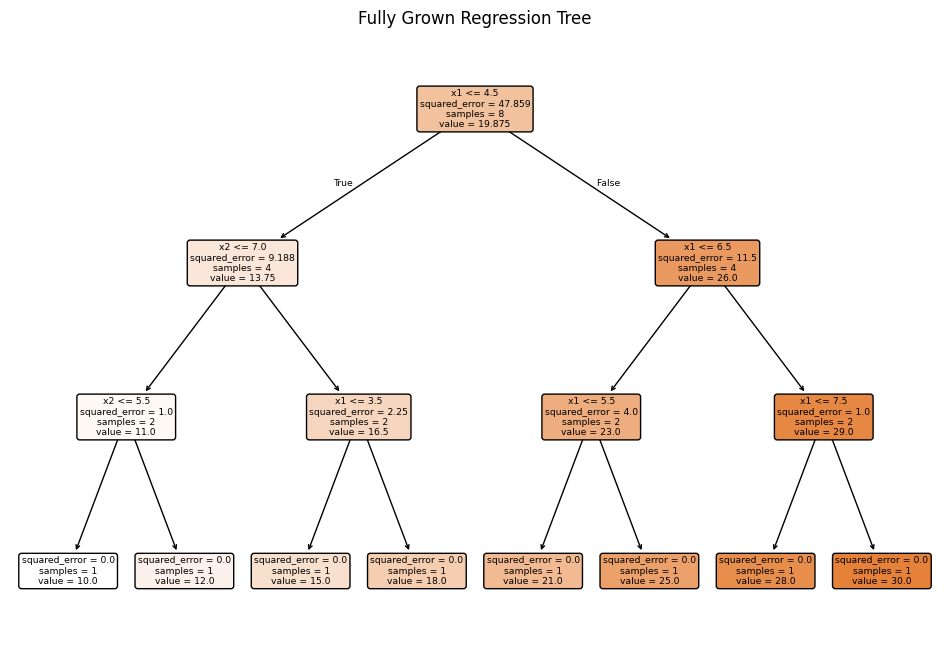

In [51]:
X = list(zip(X1, X2))

regressor = DecisionTreeRegressor()
regressor.fit(X, y)

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=['x1','x2'], rounded=True)
plt.title('Fully Grown Regression Tree')
plt.show()

Question 6. Write a code to obtain a fully grown classification tree for the data given in Q4 and visualize the classification tree. Verify your answers in Q4.

In [52]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

In [53]:
price = ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high']
maintenance = ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high']
capacity = [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5]
airbag = ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes']
profitable = ['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']

In [54]:
le_price = LabelEncoder()
le_maintenance = LabelEncoder()
le_airbag = LabelEncoder()
le_profitable = LabelEncoder()

price_encoded = le_price.fit_transform(price)
maintenance_encoded = le_maintenance.fit_transform(maintenance)
airbag_encoded = le_airbag.fit_transform(airbag)
profitable_encoded = le_profitable.fit_transform(profitable)

In [55]:
X = list(zip(price_encoded, maintenance_encoded, capacity, airbag_encoded))
y = profitable_encoded

In [56]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

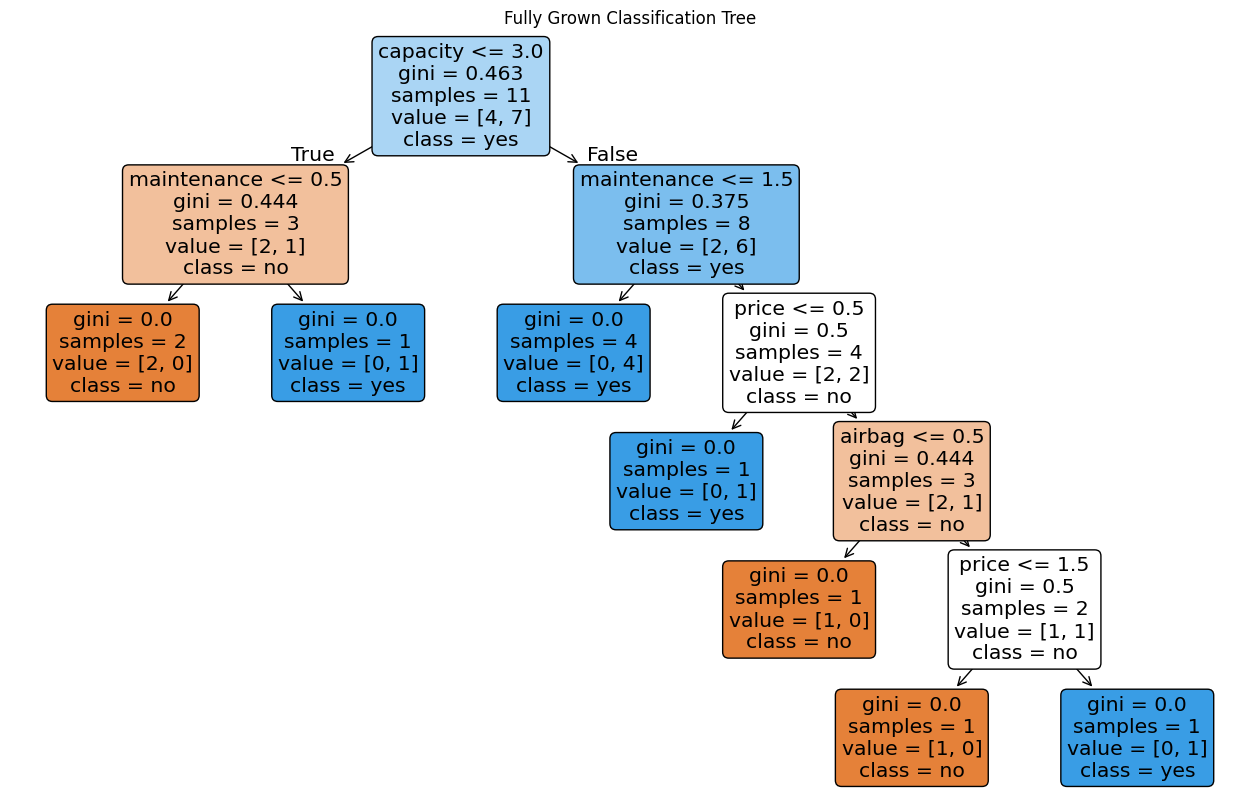

In [57]:
plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True,
          feature_names=['price', 'maintenance', 'capacity', 'airbag'],
          class_names=le_profitable.classes_,
          rounded=True)
plt.title('Fully Grown Classification Tree')
plt.show()

Question 7. Binary classification tree:

In [58]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

a. Train a fully grown binary classification tree based on Gini impurity using the dataset A4_train.csv and visualize it.

In [59]:
from google.colab import files

uploaded_files = files.upload()

Saving A4_train.csv to A4_train (1).csv


In [60]:
train_data = pd.read_csv("A4_train.csv")

In [61]:
from google.colab import files

uploaded_files = files.upload()

Saving A4_test.csv to A4_test (1).csv


In [62]:
test_data = pd.read_csv("A4_test.csv")

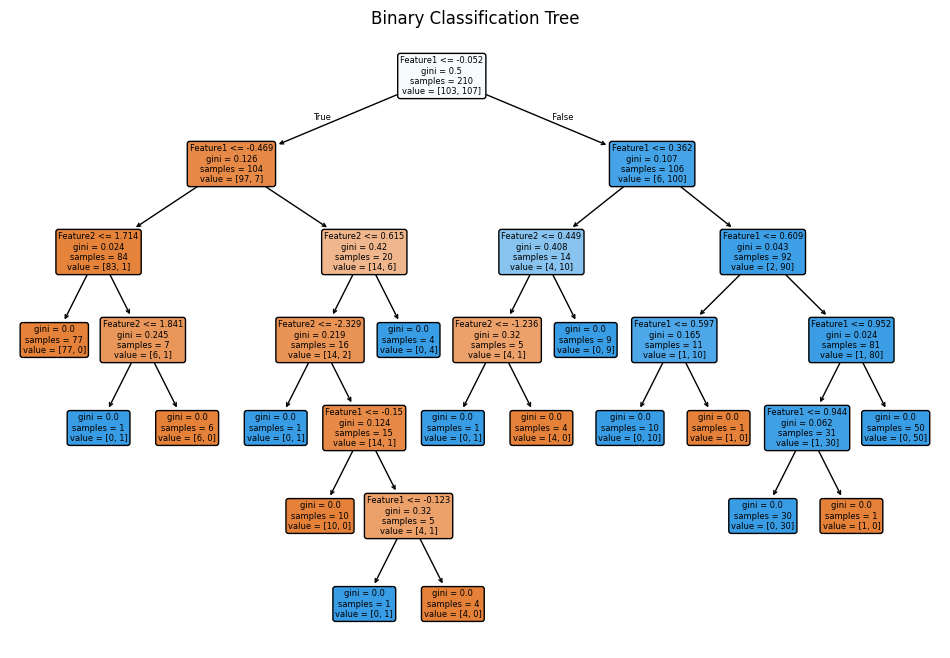

In [63]:
X_train = train_data[['Feature1', 'Feature2']]
y_train = train_data['Label']

classifier = DecisionTreeClassifier(criterion='gini')
classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(classifier, filled=True, feature_names=['Feature1', 'Feature2'], rounded=True)
plt.title('Binary Classification Tree')
plt.show()

b. Compute the Sum of Squared Errors (SSE) on the test dataset (A4_test.csv) at each depth and plot the variation of SSE with depth.

In [64]:
X_test = test_data[['Feature1', 'Feature2']]
y_test = test_data['Label']

In [65]:
sse_values = []
depths = range(1, 11)

In [66]:
for depth in depths:
    classifier = DecisionTreeClassifier(criterion='gini', max_depth=depth)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)  # SSE calculation
    sse_values.append(sse)

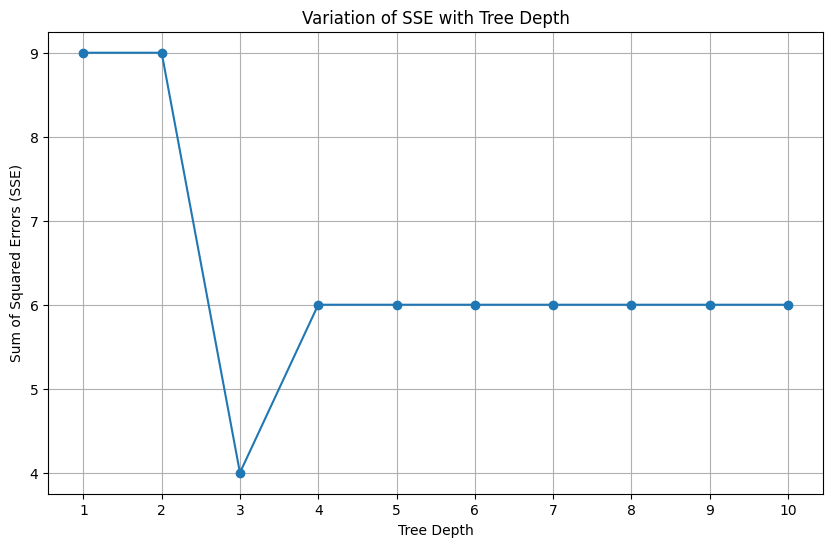

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(depths, sse_values, marker='o')
plt.title('Variation of SSE with Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(depths)
plt.grid()
plt.show()

c. Determine the optimal pruning depth by selecting the depth where the SSE change is minimal.

In [68]:
optimal_depth = depths[sse_values.index(min(sse_values))]
print(f'Optimal Pruning Depth: {optimal_depth}')

Optimal Pruning Depth: 3


d. Visualize the pruned tree.

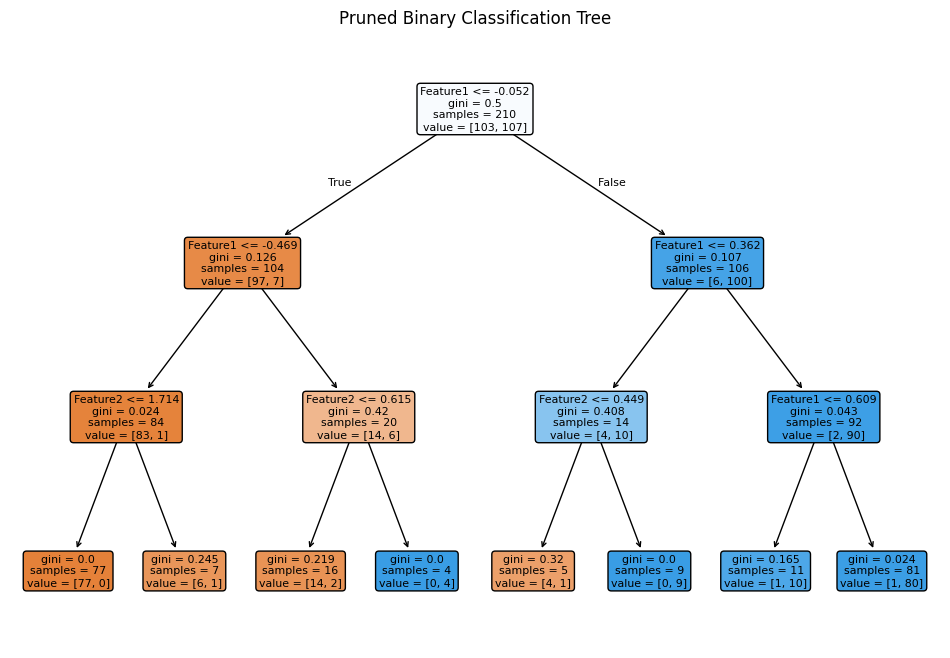

In [69]:
pruned_classifier = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth)
pruned_classifier.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(pruned_classifier, filled=True, feature_names=['Feature1', 'Feature2'], rounded=True)
plt.title('Pruned Binary Classification Tree')
plt.show()